<h1><center>K-Means Clustering</center></h1>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

In this notebook we practice k-means clustering with 2 examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation


In [1]:
import random 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\vedan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)>

In [3]:
# first we will set up a random seed where seed would be initialized to 0.
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

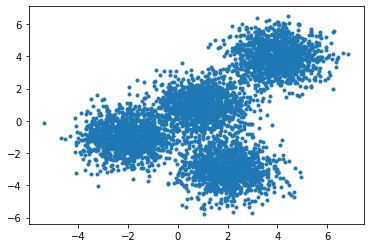

In [5]:
# Displaying the scatter-plot
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


## Building the Model

In [6]:
# initializing the k value and building the model
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [7]:
# Fitting the model
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# grabbing the labels for each point and saving it in a variable
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0])

In [9]:
# printing the coordinates of centroids of the clusters
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


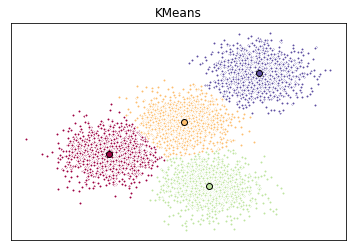

In [10]:
# plotting the graph
# Initialize the plot with specified dimensions first
figure = plt.figure(figsize=(6,4))

# Colors uses a color map, which will produce an array of colors 
# The array of colors is based on the number of labels there are.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Creating a plot
g_plot = figure.add_subplot(1, 1, 1)

# To plot the data points and the centroid we will use a for loop
# k will range from 0-3, which will match the possible clusters that each datapoint is in.

for k, col in zip(range(len([[4,4], [-2, -1], [2,-3], [1, 1]])), colors):
    
    # Creating a list of data points, where the datapoints that are in the cluster are labled as True, else they are labeled as false
    cluster_members = (k_means_labels == k)
    
    # defining the cluster centroid
    cluster_center = k_means_cluster_centers[k]
    
    # Plotting the datapoint with the color column.
    g_plot.plot(X[cluster_members, 0], X[cluster_members, 1], 'w', markerfacecolor=col, marker='.')
    g_plot.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    
# title of the plot 
g_plot.set_title('KMeans')
    
# removing the x axis ticks
g_plot.set_xticks(())
    
# removing the y axis ticks
g_plot.set_yticks(())
    
plt.show()

## Practice

Try to cluster the above dataset into 3 clusters.  
Notice: do not generate data again, use the same dataset as above.


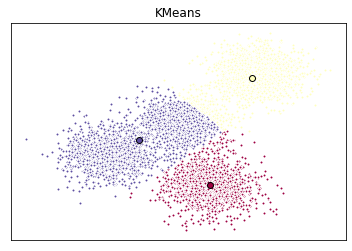

In [11]:
# write your code here
k_means_model = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)

k_means_model.fit(X)
k_means_labels_model = k_means_model.labels_

k_means_cluster_centeroids = k_means_model.cluster_centers_

figure = plt.figure(figsize=(6,4))

colors_model = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels_model))))

graph = figure.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2,-3], [1, 1]])), colors_model):
    
    # Creating a list of data points, where the datapoints that are in the cluster are labled as True, else they are labeled as false
    cluster_members_model = (k_means_labels_model == k)
    
    # defining the cluster centroid
    cluster_center_model = k_means_cluster_centeroids[k]
    
    # Plotting the datapoint with the color column.
    graph.plot(X[cluster_members_model, 0], X[cluster_members_model, 1], 'w', markerfacecolor=col, marker='.')
    graph.plot(cluster_center_model[0], cluster_center_model[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    
# title of the plot 
graph.set_title('KMeans')
    
# removing the x axis ticks
graph.set_xticks(())
    
# removing the y axis ticks
graph.set_yticks(())
    
plt.show()

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.


In [12]:
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

<h2 id="pre_processing">Pre-processing</h2

As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


In [13]:
df = cust_df.drop('Address', axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [14]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


In [15]:
cluster_num = 3
k_means = KMeans(init= 'k-means++', n_clusters = cluster_num, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [16]:
# Now we will assign the labels to each row in dataframe
df['Clus_km'] = labels
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        1  
1        0.0             12.8        0  
2        1.0             20.9        1  
3        0.0              6.3        1  
4        0.0              7.2        2

In [17]:
# Checking the centroid values by averaging the features in each cluster
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         403.780220  41.368132  1.961538       15.252747   84.076923   
1         432.006154  32.967692  1.613846        6.389231   31.204615   
2         410.166667  45.388889  2.666667       19.555556  227.166667   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         3.114412    5.770352   0.172414        10.725824  
1         1.032711    2.108345   0.284658        10.095385  
2         5.678444   10.907167   0.285714         7.322222

Now, lets look at the distribution of customers based on their age and income:


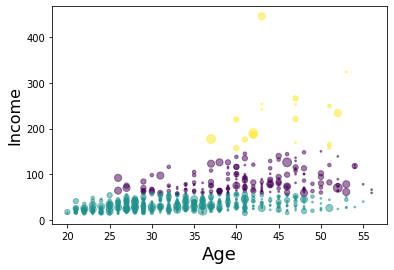

In [18]:
area = np.pi*(X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

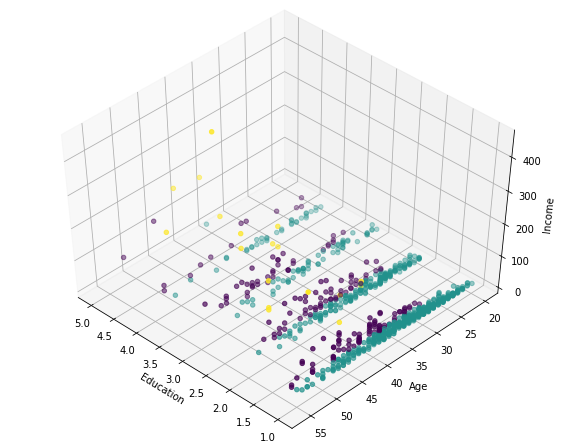

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8,6))
plt.clf()
graph_3_D = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
graph_3_D.set_xlabel('Education')
graph_3_D.set_ylabel('Age')
graph_3_D.set_zlabel('Income')

graph_3_D.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME
